In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import *

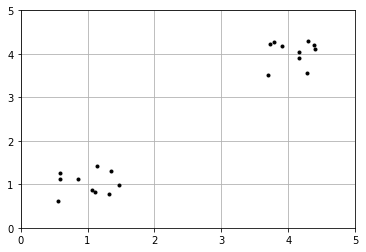

In [3]:
#随机生成一个实数，范围在（0.5,1.5）之间
cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(3.5,4.5,(2,10))
#hstack拼接操作
X=np.hstack((cluster1,cluster2)).T
plt.figure()
plt.axis([0,5,0,5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

In [5]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

In [9]:
rating_matrix_csr = load_npz('../Step 1 - Movielens Data preprocessing/ml-latest/sparse_matrix_ml-latest.npz').tocsr()

In [12]:
#coding:utf-8
#我们计算K值从1到10对应的平均畸变程度：
from sklearn.cluster import KMeans
#用scipy求解距离
from scipy.spatial.distance import cdist
K=range(1,10)
mean_distortions=[]

In [13]:
kmeans=KMeans(n_clusters=1)
kmeans.fit(rating_matrix_csr)
print("fit DONE")

fit DONE


In [16]:
mean_distortions.append(sum(np.min(
            cdist(rating_matrix_csr,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/rating_matrix_csr.shape[0])

ValueError: XA must be a 2-dimensional array.

In [19]:
np.asarray(rating_matrix_csr.toarray(), order='c')

MemoryError: 

In [ ]:
for k in K:
    print(k)
    
plt.plot(K,mean_distortions,'bx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度',fontproperties=font)
plt.title(u'用肘部法则来确定最佳的K值',fontproperties=font)